# Visualização do processo de classificação em dois grupos (class.binária)
---

### Parâmetros, Geração dos Dados e do Grid de Desenho

In [0]:
#Pacotes de Cálculo e Geração de Dados
import numpy as np

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

#Criação do conjunto de dados para classificação. Padrão de duas meias-luas
x, y = make_circles(n_samples = 2000, noise=0.1, random_state=100)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20, random_state=42)

#Definição do grid de desenho
preenchimento = 0.5
x_min, x_max = x[:, 0].min() - preenchimento, x[:, 0].max() + preenchimento
y_min, y_max = x[:, 1].min() - preenchimento, x[:, 1].max() + preenchimento

passo = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, passo), np.arange(y_min, y_max, passo))

### Visualização do dataset (estática)

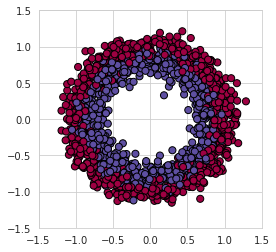

In [34]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"

import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(4,4))
plt.xlim(-1.5,1.5); plt.ylim(-1.5,1.5)

#c = cor. Atribui uma cor para cada valor distinto  em y_treino.ravel 
#s = size (tamanho) do marcador
#cmap = colormap (mapa de cores). Foi utilizado o mapa plt.cm.Spectral,
plt.scatter(x_treino[:, 0], x_treino[:, 1], c=y_treino.ravel(), 
            s=50, cmap=plt.cm.Spectral, edgecolors='black');

In [0]:
plt.close()

### Visualização do dataset (dinâmica)

In [35]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,1,figsize=(4,4))
xlim = plt.xlim(-1.5,1.5); ylim = plt.ylim(-1.5,1.5)

n_frames = 20  
n_amostras = len(x_treino)
def animate(i):
  n = int(n_amostras*i/n_frames)
  ax.scatter(x_treino[:n,0], x_treino[:n,1], s=50, 
             c=y_treino.ravel()[:n], cmap=plt.cm.Spectral, edgecolors='black')

from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"

ani = FuncAnimation(fig, animate, frames=n_frames)
plt.close()
ani

In [0]:
plt.close()

### Definição do Modelo

---
 A seguir é apresentado o modelo da rede neural a ser utilizada neste exemplo. O gráfico foi gerado a partir do site: http://alexlenail.me/NN-SVG/index.html

 ![alt_text](https://drive.google.com/uc?id=1pCCksni-wDdKqjhvX9F0_9YaUQmGmnKB)

### Funções de ativação típicas em uma rede neural
---

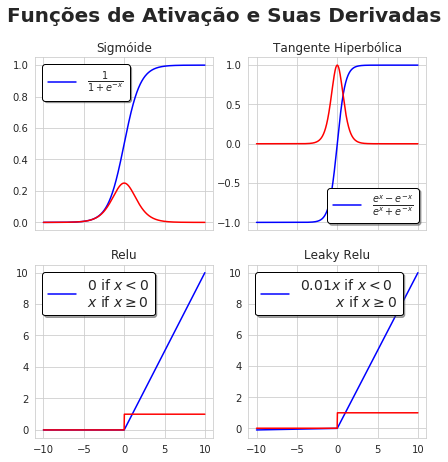

In [37]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"

x = np.arange(-10, 10, 0.01)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, 
                              figsize=((7,7)))

fig.suptitle("Funções de Ativação e Suas Derivadas", 
              fontsize=20, fontweight='bold')

y_numer = [[0,0],[0,1],[1,0],[1,1]]  

y_title = ["Sigmóide", "Tangente Hiperbólica", "Relu", "Leaky Relu"]

y = [1/(1 + np.exp(-x)),  np.tanh(x), x * (x > 0), np.where(x > 0, x, x * 0.01)]

y_legend = [r"$\frac{1}{1+e^{-x}}$",
            r"$\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$",
            r"$0$ if $x<0$" + "\n" + r"$x$ if $x\geq0$",
            r"$0.01x$ if $x<0$" + "\n        " + r"$x$ if $x\geq0$"]

def ajusta_plot(n, x, y, etiqueta, titulo):
  f = axs[n[0], n[1]]
  f.plot(x, y, color="blue", label=etiqueta)
  f.plot(x, np.gradient(y,x), color="red")
  f.legend(prop={'size': 14}, frameon=True, shadow=True,
                 facecolor="white", edgecolor="black", loc="best")
  f.set_title(titulo)

for i in range(0,4):
  ajusta_plot(y_numer[i], x, y[i], y_legend[i], y_title[i])

plt.show()


In [0]:
plt.close()

### Criação e Compilação do modelo através do pacote keras

---

Os comandos são auto explicativos. 

1   `Sequential()` irá criar um modelo em cascata (sequencial) para a rede neural. 

2  O comando seguinte `model.add` é explicado em detalhes a seguir: 
*   `model.add` adiciona uma camada (*layer*) ao modelo.
*   `model.add(Dense(` Indica que o nível a ser adicionado é totalmente conectado (denso)
*   `model.add(Dense(4,` Indica que o nível a ser adicionado terá quatro células. Observe que este NÃO é o nível de entrada. O nível de entrada é chamado de nível 0
*   `model.add(Dense(4, input_dim=2,` Indica que deverá ser adicionado um nível de entrada (nível 0) com duas células e uma primeira camada interna (nível 1) com quatro células.
*   `model.add(Dense(4, input_dim=2, activation='relu'))` Este é o comando completo. Adicionar um nível de entrada (nível 0) com duas células, um nível intermediário (nível 1) com quatro células, sendo as células do nível intermediário ativadas através da função `relu`.

3  Os comandos `model.add(Dense(n, activation='relu'))` a seguir vão criando camadas intermediárias, com *n* células totalmente conectadas, em cascata, cada uma delas com a função de ativação `relu`. Eles formam a estrutura de *deep learning* da rede. Teremos portanto:
*   `model.add(Dense(6, activation='relu'))` : segundo nível interno (nível 2) com seis células, totalmente conectadas ao primeiro nível interno, função de ativação `relu` 
*   `model.add(Dense(6, activation='relu'))` : terceiro nível interno (nível 3) com seis células, totalmente conectadas ao segundo nível interno, função de ativação `relu` 
*   `model.add(Dense(4, activation='relu'))` : quarto nível interno (nível 4) com quatro células, totalmente conectadas ao terceiro nível interno, função de ativação `relul`

4  O último nível, também chamado de nível de saída (nível 5 neste caso) será adicionado como qualquer outro nível interno através do comando mostrado a seguir. Observe que escolhemos para função de ativação deste nível não a função `relu` mas sim a `sigmóide`, para termos um sinal de saida contínuo. O comando é:
*   `model.add(Dense(1, activation='sigmoid'))`

5  Por último o modelo é compilado, isto é preparado para o treino e para a execução de suas funções de classificação 

In [39]:
#Carregamento de pacotes
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# Criação do modelo através do Keras
model = Sequential()
model.add(Dense(4, input_dim=2,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Preparação para execução (compilação)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


### Geração do Gráfico com a Evolução da Precisão do Modelo

#### Carregamento de Pacotes

In [0]:
#Carregamento dos Pacotes Gráficos
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"
import seaborn as sns
sns.set_style("whitegrid")

#Carregamento dos Pacotes Gráficos de Animação
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5" # ou "jshtml"


#### Limite da Área de Desenho

In [41]:
#Limite da área de desenho
limite = 1.5

grid = np.mgrid[-limite:limite:100j,-limite:limite:100j]
grid_2d = grid.reshape(2, -1).T
x, y = grid
print(np.mgrid[1:5:1,1:7:1])

[[[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]]

 [[1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]]]


#### Geração dos Dados de Aprendizado e Desempenho

In [42]:
#Inicializamos os vetores de armazenamento dos históricos de precisão e erro
# e das previsões para a probabilidade 
# Lembrando: 
#  loss: a função custo a ser minimizada. log-likelihood em uma rede de 
#        classificação e MSE em uma rede de regressão.
#  accuracy: percentual de acertos no conjunto em análise (treino ou teste).
dados_probs = []
dados_precisao = []
dados_erro = []

#Esta função recebe o número da época e os logs de probabilidade, precisão e erro correspondentes
# e os armazena em uma lista para acesso posterior e geração da animação
def salva_epoca(epoca, logs): 
  prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
  dados_probs.append(prediction_probs)
  dados_precisao.append(logs['acc'])
  dados_erro.append(logs['loss'])

# A função LambdaCallback devolve o número da época e os logos de probabilidade, precisão e erro correspondentes  
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=salva_epoca)

# Esta função executa o fit (ajuste) do modelo. Através da opção callbacks ela grava o status do
# modelo em cada época do treino
#Definimos o número de iterações (épocas) de treino a que o modelo será submetido 
# para seus parâmetros serem considerados ajustados (fitted)
n_epocas = 50 #número de iterações (épocas) do modelo
history = model.fit(x_treino, y_treino, epochs=n_epocas, verbose=0, callbacks=[testmodelcb])

Instructions for updating:
Use tf.cast instead.


#### Mapa de Aprendizado

In [43]:
#Mapa de Aprendizado
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('x', fontsize=15)
ax.set_xlim(-limite,limite)
ax.set_ylim(-limite,limite)
  
def animate1(i):
  cria_sufixo = lambda numero, digitos : ('0' * (digitos - len(str(numero))) + str(numero))
  ax.set_title('Classificação Binária com KERAS - época: ' + cria_sufixo(i, 3), fontsize=15)
  ax.contourf(x, y, dados_probs[i].reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
  ax.scatter(x_treino[:, 0], x_treino[:, 1], c=y_treino.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')

n_frames = 50 #número de quadros a serem gravados para animação
animacao1 = FuncAnimation(fig, animate1, frames=n_frames)
plt.close()
animacao1

In [0]:
plt.close()

#### Evolução da Precisão no Conjunto de Treino e Teste

In [0]:
#Evolução da Precisão e do Erro do Modelo
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel('Época', fontsize=15)
ax.set_ylabel('Precisão: % de acertos \n Erro: soma do log-likelihood', fontsize=15)
ax.set_xlim(0,n_epocas)
ax.set_ylim(0,1)
  
def animate2(i):
  cria_sufixo = lambda numero, digitos : ('0' * (digitos - len(str(numero))) + str(numero))
  ax.set_title('Precisão e Erro do Modelo - época: ' + cria_sufixo(i, 3), fontsize=20)
  ax.legend(['Precisão', 'Erro'], loc='upper left')
  ax.plot(dados_precisao[:i], c="blue")
  ax.plot(dados_erro[:i], c="red")
  
n_frames = 50 #número de quadros a serem gravados para animação
animacao2 = FuncAnimation(fig, animate2, frames=n_frames)
plt.close()
animacao2


In [0]:
plt.close()

#### Resultados Finais

In [0]:
#Medimos os índices de erro (loss) e precisão (accuracy)
score = model.evaluate(x_teste, y_teste, verbose=0)
print('Loss (erro):', score[0])
print('Accuracy (precisão):', score[1])

Loss (erro): 0.13297449707984924
Accuracy (precisão): 1.0


# Visualização do Gradient Descent
---

### Carregamento dos Pacotes

In [0]:
#Pacotes de Cálculo
import tensorflow as tf
import numpy as np

#Pacotes Gráficos 2D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"

#Pacote Gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

#Suporte aos pacotes gráficos
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

#Pacotes Gráficos de Animação
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"
#plt.rcParams["animation.html"] = "jshtml"


### Execução da Simulação

In [0]:
x = np.linspace(-1, 1, 200, dtype=np.float32)

#Superfície de Busca
k = 1.2 #Amplitude
w = 2.5 #Frequência de oscilação
y_fun = lambda k, w: np.sin(k*np.cos(w*x))
noise = np.random.randn(200)/10
y = y_fun(k, w) + noise

tf_y_fun = lambda k, w: tf.sin(k*tf.cos(w*x))

# Curva do Gradient Descent
x0 = -1; y0 = -1.5 #Ponto de Inicialização do Gradiente Descent
k, w = [tf.Variable(initial_value=p, dtype=tf.float32) for p in [x0,y0]]
pred = tf_y_fun(k, w)
mse = tf.reduce_mean(tf.square(y-pred))

# Taxa de Aprendizado
tx_a = 0.04
train_op = tf.train.GradientDescentOptimizer(tx_a).minimize(mse)

k_list, w_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in range(180):
        k_, w_, mse_ = sess.run([k, w, mse])
        k_list.append(k_); w_list.append(w_); cost_list.append(mse_)
        result, _ = sess.run([pred, train_op])                          

Instructions for updating:
Colocations handled automatically by placer.


###  Geração da Animação

In [0]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)

# Espaço vetorial dos parâmetros
a3D, b3D = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))  
cost3D = np.array([np.mean(np.square(y_fun(k_, w_) - y)) for k_, w_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.6)

# Espaço vetorial dos parâmetros iniciais
ax.scatter(k_list[0], w_list[0], zs=cost_list[0], s=300, c='r') 
ax.set_xlabel('k'); ax.set_ylabel('w')

# Desenho 3D da superfície de busca e da curva de gradient descent
def animate3(angle):
  ax.plot(k_list[:angle], w_list[:angle], zs=cost_list[:angle], zdir='z', c='r', lw=3) 
  ax.view_init(30 + (90 - angle)/5, 45 + angle*2)

animacao3 = FuncAnimation(fig, animate3, frames=180)
plt.close()
animacao3

# Análise do Sobreajuste (*overfitting*)

### Criando um dataset a partir das funções do scikit-learn

---

In [0]:
import numpy as np
np.set_printoptions(precision=2)

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

#make_circles irá gerar 1000 amostras,
# divididas em 2 círculos com um fator de escala de 0.3 entre eles
# os dados terão um ruido normal (gaussiano) de 0.10
x, y = make_moons(n_samples=2000, noise=.4, random_state=100)

#Definição do grid de desenho
preenchimento = 0.50
x_min, x_max = x[:, 0].min() - preenchimento, x[:, 0].max() + preenchimento
y_min, y_max = x[:, 1].min() - preenchimento, x[:, 1].max() + preenchimento

passo = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, passo), np.arange(y_min, y_max, passo))

#train_test_split divide o conjunto original x,y entre treino e teste
# com um percentual de test_size=0.1 do conjunto reservado a teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=42) 

#A seguir são apresentados exemplos dos conjuntos de treino x e y
print("x_treino[:5]:")
print(x_treino[:5])
print()
print("y_treino[:5]:")
print(y_treino[:5])



x_treino[:5]:
[[-0.78  0.66]
 [ 0.93  0.83]
 [-0.06 -0.86]
 [ 1.55  0.1 ]
 [ 0.62  0.51]]

y_treino[:5]:
[0 0 1 1 0]


### Visualização do dataset (estática)

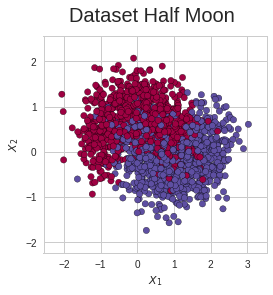

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"

import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.set_xlim( min(x[:,0].ravel())-0.5, max(x[:,0].ravel())+0.5 )
ax.set_ylim( min(x[:,1].ravel())-0.5, max(x[:,1].ravel())+0.5 )
ax.set(xlabel="$X_1$", ylabel="$X_2$")
fig.suptitle("Dataset Half Moon", fontsize=20)

plt.scatter(x_treino[:, 0], x_treino[:, 1], c=y_treino.ravel(), #c=cor
            s=40, cmap=plt.cm.Spectral, edgecolors='black'); #s=size, cmap=colormap

In [0]:
plt.close()

### Visualização do dataset através de função auxiliar
`desenha_grafico(x, y, plot_name, xx=none, yy=none, preds=none)`

In [0]:
# Função auxiliar para desenho do conjunto de dados
def desenha_grafico(x, y, plot_name, xx=None, yy=None, preds=None):
  import numpy as np
  from matplotlib import pyplot as plt
  %matplotlib inline
  plt.rcParams["figure.facecolor"] = "w"
  
  import seaborn as sns
  sns.set_style("whitegrid")

  fig, ax = plt.subplots(1,1,figsize=(4,4))
  ax.set_xlim( min(x[:,0].ravel())-0.5, max(x[:,0].ravel())+0.5 )
  ax.set_ylim( min(x[:,1].ravel())-0.5, max(x[:,1].ravel())+0.5 )
  ax.set(xlabel="$X_1$", ylabel="$X_2$")
  fig.suptitle(plot_name, fontsize=20)  
  
  if(xx is not None and yy is not None and preds is not None):
    plt.contourf(xx, yy, preds.reshape(xx.shape), 25, alpha = 0.6, cmap=cm.Spectral)
    plt.contour(xx, yy, preds.reshape(xx.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
  plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')


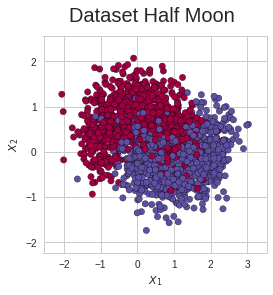

In [0]:
desenha_grafico(x, y, "Dataset Half Moon")

In [0]:
plt.close()

### Visualização dinâmica do dataset através de função auxiliar
`gera_animacao(x, y, plot_name, xx=None, yy=None, preds=None)`

In [0]:
def gera_animacao(x, y, plot_name, xx=None, yy=None, preds=None):
  import numpy as np
  from matplotlib import pyplot as plt
  plt.rcParams["figure.facecolor"] = "w"
  %matplotlib inline

  import seaborn as sns
  sns.set_style("whitegrid")
  
  n_x = len(x); n_xx = 0
  x_full, y_full = x,y
  if (xx is not None) and (yy is not None) and (preds is not None):
    n_xx = len(xx)
    x_full, y_full = np.vstack([x, xx]), np.concatenate([y, yy])
    
  fig, ax = plt.subplots(1,1,figsize=(4,4))
  x_min, x_max = min(x_full[:,0].ravel())-0.5, max(x_full[:,0].ravel())+0.5
  y_min, y_max = min(x_full[:,1].ravel())-0.5, max(x_full[:,1].ravel())+0.5
  ax.set_xlim(x_min,x_max); ax.set_ylim(y_min,y_max)
  fig.suptitle(plot_name, fontsize=20)

  n_frames = 20  
  def animate(i):
    n = int(n_x*i/n_frames)
    ax.scatter(x[:n,0], x[:n,1], s=50, c=y.ravel()[:n], 
               cmap=plt.cm.Spectral, edgecolors='black')
    if (xx is not None) and (yy is not None) and (preds is not None):
      n = int(n_xx*i/n_frames)
      ax.scatter(xx[:n,0], xx[:n,1], s=50, c=yy.ravel()[:n], 
                 cmap=plt.cm.Spectral, edgecolors='black', alpha=0.1)
  
  from matplotlib.animation import FuncAnimation
  plt.rcParams["figure.facecolor"] = "w"
  plt.rcParams["animation.html"] = "html5" #ou "jshtml"

  ani = FuncAnimation(fig, animate, frames=n_frames)
  plt.close()
  return(ani)

In [0]:
gera_animacao(x,y, "Dataset Half Moon")

In [0]:
plt.close()

### Visualização dinâmica de dois datasets através de função auxiliar
---

O segundo dataset em cada conjunto é apresentado com cor esmaecida

In [0]:
gera_animacao(x_treino, y_treino, "Treino & Teste", x_teste, y_teste, 1)

In [0]:
plt.close()

In [0]:
gera_animacao(x_teste, y_teste, "Teste & Treino", x_treino, y_treino, 1)

In [0]:
plt.close()

### Rede Neural sem Normalização (alta variância nos dados de entrada)

In [0]:
#Pacotes de machine learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from sklearn.metrics import accuracy_score

#Criação do modelo
model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

#Inicialização do dataframe de Histórico
import pandas as pd
# loss = erro, acc = precisão, val = conjunto de teste, _10 = média móvel 10 épocas 
nomes = ['tr_erro', 'tr_prec', 'tr_prec_10', 'ts_erro', 'ts_prec', 'ts_prec_10']
historico = pd.DataFrame(columns = nomes)

#Função para criação dos vetores de histórico
def historicos(epoch, logs):
  historico.loc[epoch] = [ logs['loss'], logs['acc'], 0, logs['val_loss'], logs['val_acc'], 0 ]
  historico.loc[epoch, 'tr_prec_10'] = np.mean(historico.loc[-10:,'tr_prec'])
  historico.loc[epoch, 'ts_prec_10'] = np.mean(historico.loc[-10:,'ts_prec'])

# Função a ser executada em cada etapa (época do modelo)
armazena_historico = keras.callbacks.LambdaCallback(on_epoch_end=historicos)

n_epocas = 300
history = model.fit(x_treino, y_treino, epochs=n_epocas, verbose=0, 
                    validation_data=(x_teste, y_teste), callbacks=[armazena_historico])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set_style("whitegrid")
ax.set_ylabel('acc')
ax.set_xlabel('iterations')
ax.set_xlim([0,n_epocas])

n_frames = 300 #Mesmo valor de n_epocas  
def animate(i):
  cria_sufixo = lambda numero, digitos : ('0' * (digitos - len(str(numero))) + str(numero))
  ax.set_title('Precisão do Modelo Treino x Teste - época: ' + cria_sufixo(i, 3), fontsize=20)
  ax.legend(['Treino(Precisão) ', 'Teste(Precisão)'], loc='upper left')
  ax.plot(historico.loc[:i,'tr_prec'], c="red")
  ax.plot(historico.loc[:i,'ts_prec'], c="blue")
  
#Pacotes gráficos de animação
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5" #ou "jshtml"
  
animacao = FuncAnimation(fig, animate, frames=n_frames)
plt.close()
animacao

In [0]:
plt.close()

In [0]:
#Evolução da Precisão e do Erro do Modelo
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"

import seaborn as sns
sns.set_style("whitegrid")

n_epocas = 300
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel('Época', fontsize=15)
ax.set_ylabel('Precisão', fontsize=15)
ax.set_xlim(0,n_epocas)
#ax.set_ylim(0,1)
  
def animate(i):
  cria_sufixo = lambda numero, digitos : ('0' * (digitos - len(str(numero))) + str(numero))
  ax.set_title('Precisão do Modelo MM10 do Treino x Teste - época: ' + cria_sufixo(i, 3), fontsize=20)
  ax.legend(['Treino(Precisão) ', 'Teste(Precisão)'], loc='upper left')
  ax.plot(historico.loc[:i,'tr_prec_10'], c="red")
  ax.plot(historico.loc[:i,'ts_prec_10'], c="blue")

#Pacotes gráficos de animação
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5" #ou "jshtml"

animacao = FuncAnimation(fig, animate, frames=n_epocas)
plt.close()
animacao

In [0]:
plt.close()

In [0]:
y_treino_pred = model.predict_classes(x_treino)
y_teste_pred = model.predict_classes(x_teste)
treino_acc = accuracy_score(y_treino, y_treino_pred)
teste_acc = accuracy_score(y_teste, y_teste_pred)
print("Train accuracy: " + str(treino_acc))
print("Test accuracy: " + str(teste_acc))

Train accuracy: 0.8875
Test accuracy: 0.855


# Análise do Sobreajuste (*overfitting*) - parte 2

Os dados, o grid de desenho utilizados nesta etapa são os mesmos do exercício anterior 

O código essencial é apresentado na célula a seguir:

In [0]:
###########################################################
# Dataset                                                 #
###########################################################
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 2000, noise=0.4, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

###########################################################
# Grid                                                    #
###########################################################
espessamento = 0.5; passo = 0.01
x_min, x_max = X[:, 0].min() - espessamento, X[:, 0].max() + espessamento
y_min, y_max = X[:, 1].min() - espessamento, X[:, 1].max() + espessamento
XX, YY = np.meshgrid(np.arange(x_min, x_max, passo), np.arange(y_min, y_max, passo))

### Critério de Separação Calculado por Regressão Logística

In [0]:
from sklearn.linear_model import LogisticRegression

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers

from sklearn.metrics import accuracy_score

regressor = LogisticRegression(solver='lbfgs') #Incluida a opção para eliminar future warning
regressor.fit(x_treino, y_treino)
y_treino_pred_1 = regressor.predict(x_treino)
y_teste_pred_1 = regressor.predict(x_teste)
treino_acc = accuracy_score(y_treino, y_treino_pred_1)
teste_acc = accuracy_score(y_teste, y_teste_pred_1)
print("Precisão no Treino: " + str(treino_acc))
print("Precisão no Teste: " + str(teste_acc))

Precisão no Treino: 0.83
Precisão no Teste: 0.86


In [0]:
def desenha_contorno(x, y, xx, yy, preds, plot_name, limites, tamanho):
  import numpy as np
  from matplotlib import pyplot as plt
  plt.rcParams["figure.facecolor"] = "w"
  %matplotlib inline
  
  import seaborn as sns
  sns.set_style("whitegrid")
  
  fig, ax = plt.subplots(1,1,figsize=(tamanho[0],tamanho[1]))
  
  ax.set_xlim([limites[0],limites[1]])
  ax.set_ylim([limites[2],limites[3]])
  ax.set(xlabel="$X_1$", ylabel="$X_2$")
  ax.set_title(plot_name, fontsize=20)
  ax.contourf(xx, yy, preds.reshape(xx.shape), 25, alpha = 0.6, cmap=plt.cm.Spectral)
  ax.contour(xx, yy, preds.reshape(xx.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
  ax.scatter(x[:, 0], x[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
  plt.show()

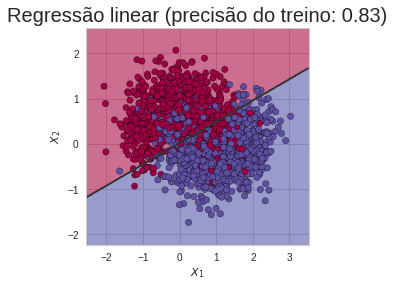

In [0]:
preds = regressor.predict(np.c_[xx.ravel(),yy.ravel()])
title = "Regressão Logística (precisão do treino: {0:.2f})".format(treino_acc)
limites = [x_min,x_max,y_min,y_max]
tamanho = [4,4]
desenha_contorno(x_treino, y_treino, xx, yy, preds, title, limites, tamanho)

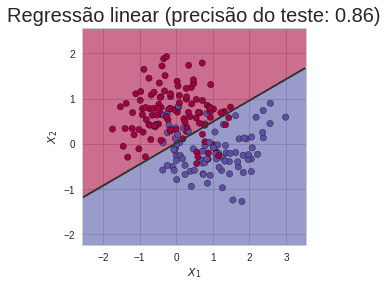

In [0]:
preds = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
title = "Regressão Logística (precisão do teste: {0:.2f})".format(teste_acc)
limites = [x_min,x_max,y_min,y_max]
tamanho = [4,4]
desenha_contorno(x_teste, y_teste, xx, yy, preds, title, limites, tamanho)

### Rede neural sem regularização

In [0]:
from sklearn.linear_model import LogisticRegression

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model.fit(x_treino, y_treino, epochs=300, verbose=0)

In [0]:
y_treino_pred_2 = model.predict_classes(x_treino)
y_teste_pred_2 = model.predict_classes(x_teste)
treino_acc = accuracy_score(y_treino, y_treino_pred_2)
teste_acc = accuracy_score(y_teste, y_teste_pred_2)
print("Precisão do Treino: " + str(treino_acc))
print("Precisão do Teste: " + str(teste_acc))

Precisão do Treino: 0.891875
Precisão do Teste: 0.8625


In [0]:
#Não implementada / testada
model_json = model.to_json()
with open("nn_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("nn_model.h5")
print("Saved model to disk")

Saved model to disk


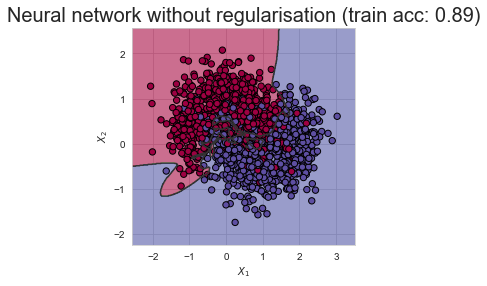

In [0]:
preds = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
title = "Rede neural sem regularização (precisão do treino: {0:.2f})".format(treino_acc)
limites = [x_min,x_max,y_min,y_max]
tamanho = [4,4]
desenha_contorno(x_treino, y_treino, xx, yy, preds, title, limites, tamanho)

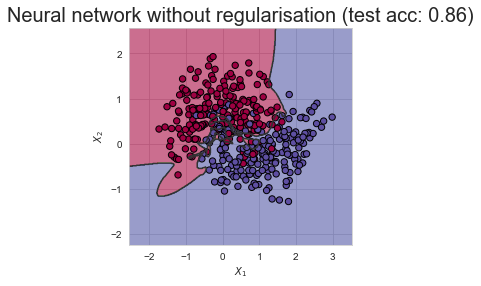

In [0]:
preds = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
title = "Rede neural sem regularização (Precisão do teste: {0:.2f})".format(teste_acc)
limites = [x_min,x_max,y_min,y_max]
tamanho = [4,4]
desenha_contorno(x_teste, y_teste, xx, yy, preds, title, limites, tamanho)

### Rede Neural com Regularização

In [0]:
from sklearn.linear_model import LogisticRegression

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model.fit(x_treino, y_treino, epochs=300, verbose=0)

In [0]:
y_treino_pred_3 = model.predict_classes(x_treino)
y_teste_pred_3 = model.predict_classes(x_teste)
treino_acc = accuracy_score(y_treino, y_treino_pred_3)
teste_acc = accuracy_score(y_teste, y_teste_pred_3)
print("Precisão no Treino: " + str(treino_acc))
print("Precisão no Teste: " + str(teste_acc))

Precisão no Treino: 0.864375
Precisão no Teste: 0.8825


In [0]:
#Não implementada / testada
model_json = model.to_json()
with open("nn_reg_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("nn_reg_model.h5")
print("Saved model to disk")

Saved model to disk


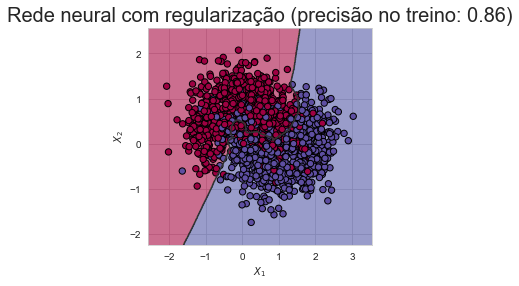

In [0]:
preds = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
title = "Rede neural com regularização (precisão no treino: {0:.2f})".format(treino_acc)
limites = [x_min,x_max,y_min,y_max]
tamanho = [4,4]
desenha_contorno(x_treino, y_treino, xx, yy, preds, title, limites, tamanho)

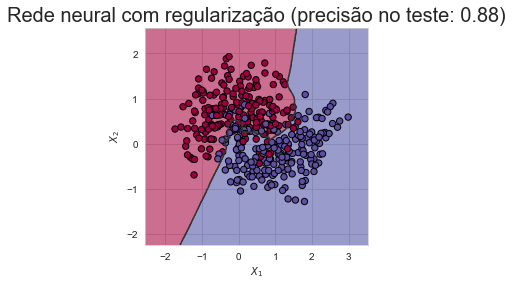

In [0]:
preds = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
title = "Rede neural com regularização (precisão no teste: {0:.2f})".format(teste_acc)
limites = [x_min,x_max,y_min,y_max]
tamanho = [4,4]
desenha_contorno(x_teste, y_teste, xx, yy, preds, title, limites, tamanho)

# Análise do Sobreajuste (*overfitting*) - parte 3

Os dados, o grid de desenho utilizados nesta etapa são os mesmos do exercício anterior.

O código essencial é apresentado na célula a seguir:

In [0]:
###########################################################
# Dataset                                                 #
###########################################################
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 2000, noise=0.4, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

###########################################################
# Grid                                                    #
###########################################################
espessamento = 0.5; passo = 0.01
x_min, x_max = X[:, 0].min() - espessamento, X[:, 0].max() + espessamento
y_min, y_max = X[:, 1].min() - espessamento, X[:, 1].max() + espessamento
XX, YY = np.meshgrid(np.arange(x_min, x_max, passo), np.arange(y_min, y_max, passo))

In [0]:
###########################################################
# função para criação dos modelos com e sem regularização #
###########################################################
from sklearn.linear_model import LogisticRegression
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from sklearn.metrics import accuracy_score

def model_generation(_lambda=0, regularized=False):
  model = Sequential()
  model.add(Dense(8, input_dim=2,activation='relu'))
  model.add(Dense(32, activation='relu'))
  
  if regularized:
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))
  else:
    model.add(Dense(128, activation='relu'))
  
  model.add(Dense(256, activation='relu'))
  
  if regularized:
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))
  else:
    model.add(Dense(128, activation='relu'))
  
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])  
  return(model)

#####################################################
# função para criação do gráfico da matriz de pesos #
#####################################################
def plot_weights_matrix(model, camada, plot_name):
  import seaborn as sns
  import matplotlib.pyplot as plt
  from matplotlib import cm
  from mpl_toolkits.mplot3d import Axes3D
  sns.set_style("whitegrid")
    
  weights = model.layers[camada].get_weights()[0]
  min_val = round(weights.min(), 2)
  max_val = round(weights.max(), 2)
  mean_val = round(weights.mean(), 2)
  shape = weights.shape
  X = np.array(range(shape[1]))
  Y = np.array(range(shape[0]))
  X, Y = np.meshgrid(X, Y)
  plt.style.use('dark_background')
  fig = plt.figure(figsize=(5,5))
  ax = fig.gca(projection='3d')
  plt.title("\n" + plot_name + "\n[MIN: " + str(min_val) + ", MAX: " + str(max_val) + ", MEAN: " + str(mean_val) + "]", fontsize=12, y=1.05)
  surf = ax.plot_surface(X, Y, weights, cmap=plt.get_cmap('rainbow'), linewidth=0)
  return(surf) 


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


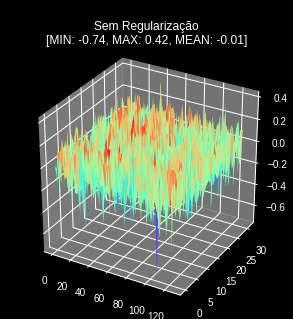

In [0]:
modelo_1 = model_generation()
history = modelo_1.fit(X_train, y_train, epochs=200, verbose=0)

#Aplicar logo após o modelo sem regularização
camada = 2 # index of the layer we want to visualize
plot_weights_matrix(modelo_1, camada, "Sem Regularização")

###Rede Neural com Regularisação

In [0]:
modelos = []
historicos = []
_lambdas = []
maximos = []
minimos = []
camada = 2

for i in range(-5, 1):
  _lambda = 10**i
  modelo = model_generation(_lambda, True)
  historico = modelo.fit(X_train, y_train, epochs=200, verbose=0)
  weights = modelo.layers[camada].get_weights()[0]
  min_val = weights.min()
  max_val = weights.max()
  modelos.append(modelo)
  historicos.append(historico)
  _lambdas.append(_lambda)
  maximos.append(max_val)
  minimos.append(min_val)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"

plt.style.use('dark_background')
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

def plot_weights_matrix_animate(model, camada, nome_grafico):
  weights = model.layers[camada].get_weights()[0]
  min_val = round(weights.min(), 2)
  max_val = round(weights.max(), 2)
  mean_val = round(weights.mean(), 2)
  shape = weights.shape
  X = np.array(range(shape[1]))
  Y = np.array(range(shape[0]))
  X, Y = np.meshgrid(X, Y)
  ax.cla()
  ax.set_zlim(min(minimos),max(maximos))
  ax.set_title("\n" + nome_grafico + "\n[MIN: " + str(min_val) + ", MAX: " + 
            str(max_val) + ", MEAN: " + str(mean_val) + "]", fontsize=12, y=1.05)
  ax.plot_surface(X, Y, weights, cmap=plt.get_cmap('rainbow'), linewidth=0)
  
def animate(i):
  camada = 2
  titulo = "Com regularização - [lambda = {}]".format(str(_lambdas[i]))
  plot_weights_matrix_animate(modelos[i], camada, titulo)

animacao = FuncAnimation(fig, animate, frames=len(modelos))
plt.close()
animacao